# I. Dimension Reduction

- 차원의 저주: 변수(차원)가 증가하면서 고차원으로 갈수록 희소(sparse)해짐 (무작위로 두 점의 평균 거리를 산출했을 때 그 거리가 멀어짐)
- 해결하기 위해 엄청나게 많은 데이터를 확보하는 방법이 있지만, 차원이 늘어날수록 필요한 데이터의 양이 기하급수적으로 증가하여, 현실적으로는 불가능
- 데이터를 저차원으로 투영하여 차원 축소를 진행

## PCA (Principal Component Analysis): 데이터를 정사영시켜 차원을 낮춘다면, 어떤 벡터에 정사영 시키는 것이 원 데이터 구조를 잘 유지할 수 있을까"에 대한 분석


- "데이터 벡터를 어떤 벡터에 정사영하는 것이 최적의 결과일지
정사영할 벡터를 찾을 때 데이터 분포의 중심을 축(pivot)으로 하는 벡터를 찾는 것이 좋지 않을지"

- PCA의 가정
 - 대상이 되는 데이터는 linear하며, 우리가 찾은 선들은 직교
linear한 것을 가정, 선형 결합으로 표현하기 때문에 비선형 데이터에 취약할 수 있음
큰 분산을 가지는 축이 중요한 정보를 가지고 있을 것
 - 분산이 높다는 것은, 감소시킨 차원이 일정 부분 변화할 때 기존 변수도 높은 관계성을 가지고 변화한다는 것을 의미
 - 공분산: feature pairs의 변동이 얼마나 유사한지. 즉, 하나의 feature이 변화할 때 다른 feature의 변화가 얼마나 유사한지
 - PCA의 과정: 정사영 후 각 차원의 분산을 최대화하는 것에 관심이 있음
가장 큰 분산을 가지는 축을 찾은 후, 먼저 찾은 축을 기준으로 직교하는 축들 중에 또 가장 큰 축을 찾는 과정을 거침
 - 새로 생성된 각 차원들은 선형독립임
 - 하나의 component가 다른 component보다 적은 분산을 가질 경우 분산이 큰 component를 더 중요하게 반영하여 PCA가 수행될 것임
 - PCA를 하는 것은 자료를 요약하고, 메모리를 절약하고 과적합 방지, 정보손실을 적게 하면서도 불필요한 변수들을 새로운 변수로/제거, 이미지의 경우 (e.g., eigenface) 노이즈 감소 등의 효과

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 279 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=4e5d2d2033f7b1228903bd2ee424b865d90e5381ba323cf8dc288e9b0cddac80
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

- Step 1. Dataset & Preprocessing
 - Description
  - 25 personality self report items taken from the International Personality Item Pool (ipip.ori.org) were included as part of the Synthetic Aperture Personality Assessment (SAPA) web based personality assessment project. 
  - The data from 2800 subjects are included here as a demonstration set for scale construction, factor analysis, and Item Response Theory analysis. Three additional demographic variables (sex, education, and age) are also included. This data set is deprecated and users are encouraged to use bfi.
  - A data frame with 2800 observations on the following 28 variables. (The q numbers are the SAPA item numbers).
  - features
   - A1: Am indifferent to the feelings of others. (q_146)
   - A2: Inquire about others' well-being. (q_1162)
   - A3: Know how to comfort others. (q_1206)
   - A4: Love children. (q_1364)
   - A5: Make people feel at ease. (q_1419)
   - C1: Am exacting in my work. (q_124)
   - C2: Continue until everything is perfect. (q_530)
   - C3: Do things according to a plan. (q_619)
   - C4: Do things in a half-way manner. (q_626)
   - C5: Waste my time. (q_1949)
   - E1: Don't talk a lot. (q_712)
   - E2: Find it difficult to approach others. (q_901)
   - E3: Know how to captivate people. (q_1205)
   - E4: Make friends easily. (q_1410)
   - E5: Take charge. (q_1768)
   - N1: Get angry easily. (q_952)
   - N2: Get irritated easily. (q_974)
   - N3: Have frequent mood swings. (q_1099)
   - N4: Often feel blue. (q_1479)
   - N5: Panic easily. (q_1505)
   - O1: Am full of ideas. (q_128)
   - O2: Avoid difficult reading material.(q_316)
   - O3: Carry the conversation to a higher level. (q_492)
   - O4: Spend time reflecting on things. (q_1738)
   - O5: Will not probe deeply into a subject. (q_1964)
   - gender: Males = 1, Females = 2
   - education: 1 = HS, 2 = finished HS, 3 = some college, 4 = college graduate 5 = graduate degree
   - age: age in years

- Source: https://vincentarelbundock.github.io/Rdatasets/doc/psych/bfi.html
- Data Source: https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jej0312/DM_TA/main/data/bfi.csv', index_col =0)
data.drop(['gender', 'education', 'age'], axis=1, inplace=True)
data.dropna(inplace=True)
# data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25']
data.head()

A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N1   N2   N3  \
61617  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  4.0  ...  3.0  4.0  2.0   
61618  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  4.0  ...  3.0  3.0  3.0   
61620  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  5.0  ...  4.0  5.0  4.0   
61621  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  5.0  ...  2.0  5.0  2.0   
61622  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  2.0  ...  2.0  3.0  4.0   

        N4   N5   O1  O2   O3   O4   O5  
61617  2.0  3.0  3.0   6  3.0  4.0  3.0  
61618  5.0  5.0  4.0   2  4.0  3.0  3.0  
61620  2.0  3.0  4.0   2  5.0  5.0  2.0  
61621  4.0  1.0  3.0   3  4.0  3.0  5.0  
61622  4.0  3.0  3.0   3  4.0  3.0  3.0  

[5 rows x 25 columns]

In [ ]:
data1 = pd.read_csv('pm_train.csv', index_col =0)
data1.drop(['id', 'cycle'], axis=1, inplace=True)
data1.dropna(inplace=True)
# data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25']
data1.head()
data1.shape

(20631, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


  - PCA을 수행하기 전 standardization을 통해 분산을 고정하는 것이 중요함
   - 데이터의 스케일에 따라 주성분의 설명 가능한 분산량이 달라질 수 있음
따라서, scaling(centering)을 통해 변수가 가진 값의 크기에 따라 설명 가능한 분산량이 왜곡되는 것에 따른 모델 성능이 저하를 방지함
   - 예를 들어, 키(m)와 몸무게(kg)가 다른 scale을 가지고 있을 때 (키가 더 적게 변화) scaling을 하지 않으면 몸무게가 maximal variance의 방향을 결정할 것임. 따라서 키(m)의 변화 1은 몸무게(kg)의 변화 1보다 더 중요하게 반영이 될 것인데 이렇게 다른 가중치를 두는 것을 옳지 않음
   - 공분산 행렬을 계산할 때 각 feature의 평균은 0으로 맞춰주어야 결과에 대해 직관적으로 해석하기 용이함

In [ ]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
data_scale.mean(axis=0).head()

A1   -2.061615e-16
A2   -5.614921e-16
A3   -7.031412e-16
A4    1.956563e-16
A5   -2.829337e-16
dtype: float64

In [ ]:
data1_scale = pd.DataFrame(StandardScaler().fit_transform(data1), 
                           columns=data1.columns, index = data1.index)
data1_scale.mean(axis=0).head()

setting1   -9.880129e-18
setting2    6.097267e-16
setting3    0.000000e+00
s1          0.000000e+00
s2          6.258537e-14
dtype: float64

In [ ]:
data1_scale.cov() # 공분산행렬

setting1  setting2  setting3   s1        s2        s3        s4  \
setting1  1.000048  0.011661       0.0  0.0  0.009030 -0.005651  0.009544   
setting2  0.011661  1.000048       0.0  0.0  0.007267  0.009068  0.014674   
setting3  0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s1        0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s2        0.009030  0.007267       0.0  0.0  1.000048  0.602639  0.714984   
s3       -0.005651  0.009068       0.0  0.0  0.602639  1.000048  0.678446   
s4        0.009544  0.014674       0.0  0.0  0.714984  0.678446  1.000048   
s5        0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s6       -0.001340  0.014355       0.0  0.0  0.132249  0.116045  0.150487   
s7       -0.009438 -0.016679       0.0  0.0 -0.702170 -0.664628 -0.793168   
s8       -0.000427  0.013285       0.0  0.0  0.662357  0.602510  0.746888   
s9       -0.004279 -0.005425       0.0  0.0  0.273778  0.322980  0.297443   
s10       0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s11       0.011658  0.011691       0.0  0.0  0.740056  0.695934  0.830176   
s12      -0.001491 -0.010923       0.0  0.0 -0.724614 -0.680340 -0.815630   
s13       0.002318  0.018157       0.0  0.0  0.661825  0.600992  0.745195   
s14      -0.004470 -0.006311       0.0  0.0  0.179761  0.237149  0.190757   
s15       0.007652  0.014157       0.0  0.0  0.676008  0.639952  0.758496   
s16       0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s17       0.002599  0.012280       0.0  0.0  0.629916  0.600046  0.703533   
s18       0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s19       0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s20      -0.005713 -0.010555       0.0  0.0 -0.661873 -0.625972 -0.748103   
s21      -0.014559 -0.007846       0.0  0.0 -0.668083 -0.633932 -0.745229   
ttf      -0.003199 -0.001948       0.0  0.0 -0.606513 -0.584549 -0.678981   

           s5        s6        s7  ...       s13       s14       s15  s16  \
setting1  0.0 -0.001340 -0.009438  ...  0.002318 -0.004470  0.007652  0.0   
setting2  0.0  0.014355 -0.016679  ...  0.018157 -0.006311  0.014157  0.0   
setting3  0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s1        0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s2        0.0  0.132249 -0.702170  ...  0.661825  0.179761  0.676008  0.0   
s3        0.0  0.116045 -0.664628  ...  0.600992  0.237149  0.639952  0.0   
s4        0.0  0.150487 -0.793168  ...  0.745195  0.190757  0.758496  0.0   
s5        0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s6        0.0  1.000048 -0.155728  ...  0.158284 -0.002112  0.149049  0.0   
s7        0.0 -0.155728  1.000048  ... -0.764648 -0.110058 -0.747087  0.0   
s8        0.0  0.152168 -0.767170  ...  0.826124 -0.144794  0.700983  0.0   
s9        0.0  0.019348 -0.217846  ... -0.034764  0.963203  0.293767  0.0   
s10       0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s11       0.0  0.160022 -0.822845  ...  0.780799  0.163416  0.780951  0.0   
s12       0.0 -0.155891  0.812752  ... -0.788479 -0.098145 -0.766089  0.0   
s13       0.0  0.158284 -0.764648  ...  1.000048 -0.147043  0.697696  0.0   
s14       0.0 -0.002112 -0.110058  ... -0.147043  1.000048  0.193770  0.0   
s15       0.0  0.149049 -0.747087  ...  0.697696  0.193770  1.000048  0.0   
s16       0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s17       0.0  0.130816 -0.692926  ...  0.627440  0.246633  0.669237  0.0   
s18       0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s19       0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s20       0.0 -0.141425  0.736199  ... -0.686206 -0.187374 -0.707706  0.0   
s21       0.0 -0.137425  0.737482  ... -0.688981 -0.192424 -0.704077  0.0   
ttf       0.0 -0.128355  0.657255  ... -0.562596 -0.306784 -0.642698  0.0   

    

 - Step 2. Principle component 수 선택
  - PC 선택: 몇 개까지 선택할지는 분석가의 결정에 따름
   - 방안 1: Eigen value가 1 이상일 때까지
   - 방안 2: Scree plot 그래프 기울기가 완만해지기 전의 값까지
   - 방안 3: 약 80% 이상의 분산을 설명하는 PC 개수 채택

In [ ]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)
print(data_scale)
print(X_p)

             A1        A2        A3        A4        A5        C1        C2  \
61617 -0.288867 -0.676006 -1.219235 -0.463061 -0.427781 -2.044561 -1.040527   
61618 -0.288867 -0.676006  0.306218 -1.809945  0.359284  0.384581 -0.282309   
61620  1.843498 -0.676006  0.306218 -0.463061 -0.427781 -0.425133  0.475910   
61621  1.132710 -0.676006  1.068944  0.210382  0.359284 -0.425133 -0.282309   
61622 -0.288867 -1.523972 -1.219235 -0.463061  0.359284 -0.425133 -0.282309   
...         ...       ...       ...       ...       ...       ...       ...   
67547  0.421921 -0.676006 -1.219235 -2.483387 -1.214845  0.384581 -0.282309   
67549  1.843498  0.171960  0.306218  0.210382 -1.214845  0.384581 -0.282309   
67556 -0.288867 -1.523972  0.306218 -1.809945  0.359284  0.384581  0.475910   
67559  1.843498 -2.371938 -1.981961 -0.463061 -0.427781  0.384581  0.475910   
67560 -0.288867 -1.523972 -2.744688 -0.463061 -2.001910  0.384581  0.475910   

             C3        C4        C5  ...        N1 

In [ ]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data1_scale)
print(X_p[0])

[-3.16414411e+00 -4.59252911e-01 -1.17166993e+00  4.75838017e-01
 -6.66436403e-01  8.79839073e-01  2.47914176e-02 -6.32462881e-01
 -3.24610262e-01  3.10733002e-02  6.50457730e-01  2.83419628e-01
  2.27959979e-01 -1.57382910e-01 -3.60382827e-01 -7.76110704e-01
 -4.29978138e-01  3.52308140e-01  5.78449757e-17 -1.03621545e-16
 -3.89024211e-17 -2.73502413e-17  8.31367829e-33 -1.62815136e-33
  3.13844598e-36]


   - 방안 1. Eigen value가 1 이상일 때까지
Eigen vector (고유 벡터): 데이터가 어떤 방향으로 분산되어 있는지. 행렬이 벡터에 작용하는 주축(principal axis)의 방향을 나타냄
원 차원의 수만큼 eigenvector가 생성됨
주축 위에 정사영하는 것이 분산이 가장 큰 결과를 얻을 수 있음 (선형변환을 했을 때 크기만 바뀌고 방향이 변하지 않도록 함)

   - Eigen value (고유 값): 고유벡터 방향으로 얼마만큼의 크기로 벡터공간이 늘려지는가, 즉 고유벡터의 크기를 의미함
   - Eigen value가 큰 순서대로 고유 벡터를 정렬하는 것이, 중요한 순서대로 주성분을 구성한다는 의미



In [ ]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))


eigen value: [5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247
 0.83953893 0.79920618 0.71898919 0.68808879 0.67637336 0.65179984
 0.62325295 0.59656284 0.56309083 0.54330533 0.51451752 0.49450315
 0.48263952 0.448921   0.42336611 0.40067145 0.38780448 0.38185679
 0.26253902] 

적합한 PC 개수: 6


   - 방안 2. Scree plot 그래프 기울기가 완만해지기 전까지
Scree plot: 고유값-주성분의 분산 변화를 보는 그래프로, 고유값 변화율이 완만해지는 부분이 필요한 주성분의 수

In [ ]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

   - Factors가 (6 -> 7) 이후로 (7 -> 8)에서 기울기가 완만해지는 것을 보임
따라서 기울기가 완만해지기 전의 값으로, 적합한 PC 개수는 6

In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [0.20537245 0.11007547 0.08570808 0.0740931  0.06192651 0.0429433
 0.03358156 0.03196825 0.02875957 0.02752355 0.02705493 0.02607199
 0.02493012 0.02386251 0.02252363 0.02173221 0.0205807  0.01978013
 0.01930558 0.01795684 0.01693464 0.01602686 0.01551218 0.01527427
 0.01050156]
누적 분산 설명 비율:
 [0.20537245 0.31544791 0.40115599 0.4752491  0.53717561 0.58011891
 0.61370047 0.64566871 0.67442828 0.70195183 0.72900677 0.75507876
 0.78000888 0.80387139 0.82639503 0.84812724 0.86870794 0.88848807
 0.90779365 0.92575049 0.94268513 0.95871199 0.97422417 0.98949844
 1.        ]


In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [5.33528545e-01 1.18326752e-01 5.62421635e-02 5.51211132e-02
 5.34496546e-02 2.31532158e-02 2.19695804e-02 2.03705692e-02
 1.92173907e-02 1.69939918e-02 1.60838433e-02 1.41319815e-02
 1.14486390e-02 1.08581239e-02 9.79520804e-03 9.57524510e-03
 8.10775504e-03 1.62622762e-03 3.76367444e-34 2.99488961e-34
 3.23836303e-35 2.26332025e-35 2.27772856e-66 3.23060996e-67
 2.09096182e-71]
누적 분산 설명 비율:
 [0.53352855 0.6518553  0.70809746 0.76321857 0.81666823 0.83982144
 0.86179102 0.88216159 0.90137898 0.91837298 0.93445682 0.9485888
 0.96003744 0.97089556 0.98069077 0.99026602 0.99837377 1.
 1.         1.         1.         1.         1.         1.
 1.        ]


   - PC 6까지 채택할 경우, 누적 분산 설명 비율은 약 58%

In [ ]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

  - 방안 3. 약 80% 이상의 분산을 설명하는 PC 건수 채택

In [ ]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.85 이상
print('적합한 PC 개수:', d) # 17개 선택 (PC16까지 활용)

적합한 PC 개수: 14


 - Step 3. PCA
  - 방안 1, 방안 2에서 공통적으로 제시한 결과를 기반으로, PC 6까지 사용하여 실습을 진행

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Eigen Vector
pd.DataFrame(pca.components_[:,:6], 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
             index=data.columns)

PC1       PC2       PC3       PC4       PC5       PC6
A1  0.110202 -0.218902 -0.245872 -0.201804 -0.270364 -0.165829
A2  0.015719 -0.188571 -0.190528 -0.075120 -0.113973 -0.092649
A3  0.118324 -0.153905 -0.201259 -0.129908 -0.210261  0.357013
A4  0.029509  0.090576  0.067831  0.241235  0.016945  0.153227
A5  0.490281 -0.333324 -0.255208 -0.189163 -0.150969  0.032915
C1 -0.422041  0.162960 -0.043447 -0.046223 -0.187215 -0.125232
C2  0.194210 -0.159139  0.127331  0.502886  0.047269 -0.203797
C3  0.040235  0.242298  0.164480  0.119154 -0.091919 -0.330289
C4  0.195248 -0.031171 -0.004665  0.395280 -0.036071  0.208255
C5  0.207383 -0.086872 -0.119081  0.113891 -0.003064 -0.425534
E1  0.230832 -0.044491  0.315460 -0.328029  0.432253  0.179712
E2 -0.195680 -0.133505 -0.037033  0.125792 -0.095074  0.128305
E3 -0.392696 -0.296260  0.048634 -0.271432 -0.002915 -0.091515
E4  0.041673  0.012441  0.045402  0.007252  0.010874 -0.134011
E5 -0.016407 -0.053556 -0.025337  0.172484 -0.254954 -0.217247
N1  0.229980  0.252612 -0.136914 -0.077559 -0.023398 -0.057846
N2  0.125838 -0.086234  0.096534 -0.123900  0.245375 -0.384982
N3  0.198142  0.278735  0.125733 -0.297505 -0.013912 -0.257984
N4 -0.271262 -0.304370 -0.386350  0.086941  0.436748 -0.225680
N5 -0.055620  0.111299  0.143735 -0.157595 -0.362582 -0.039862
O1 -0.019829 -0.450869  0.551804 -0.034680  0.005892  0.000948
O2  0.020874 -0.230460  0.194413  0.149635 -0.159082  0.035404
O3  0.002135  0.031397 -0.065868  0.055157  0.011115  0.114567
O4  0.022135  0.152390 -0.255003  0.056343  0.360360  0.117636
O5  0.000779  0.096172 -0.047424 -0.073122  0.009069 -0.000278

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Eigen Vector
pd.DataFrame(pca.components_[:,:9], 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'], 
             index=data1.columns)

PC1           PC2           PC3           PC4  \
setting1  2.238518e-03  4.764829e-03  1.110223e-16  0.000000e+00   
setting2 -5.942829e-03 -1.465222e-02 -2.775558e-17 -0.000000e+00   
setting3  6.698846e-01  7.290705e-01  2.775558e-17  0.000000e+00   
s1        7.241405e-01 -6.021282e-01 -0.000000e+00  2.775558e-17   
s2       -1.613890e-01  3.246483e-01 -2.775558e-17 -2.775558e-17   
s3        1.709496e-02 -4.187114e-03 -0.000000e+00  1.249001e-16   
s4       -4.004543e-03 -1.030406e-02 -6.938894e-17 -2.393918e-16   
s5       -8.607559e-03  4.778814e-03 -1.110223e-16  0.000000e+00   
s6        4.191341e-03  3.986399e-03  1.942890e-16  1.387779e-17   
s7       -1.013176e-02  3.366263e-03  2.775558e-17  1.387779e-16   
s8        1.923763e-03 -5.700502e-03 -1.387779e-17 -1.665335e-16   
s9        5.986556e-03 -3.460541e-03  0.000000e+00  1.526557e-16   
s10       6.452299e-03  2.308752e-03 -5.551115e-17 -2.220446e-16   
s11       1.053387e-02  1.242685e-03  1.110223e-16  2.220446e-16   
s12      -1.483133e-03 -9.695519e-04 -2.289835e-16 -1.318390e-16   
s13      -3.919468e-03 -6.093614e-03 -1.387779e-17  6.938894e-17   
s14       8.713212e-03 -4.450096e-04 -0.000000e+00  2.220446e-16   
s15      -4.898134e-04 -7.480818e-04 -1.613293e-16  2.498002e-16   
s16      -4.455713e-20 -1.482771e-17  3.322384e-02  1.059627e-01   
s17      -4.676546e-18  8.758995e-17  9.024950e-01  4.240285e-01   
s18      -6.453964e-19  4.578209e-17 -1.926483e-01  4.127873e-01   
s19      -1.105744e-18  7.933018e-17 -3.837781e-01  7.991110e-01   
s20       0.000000e+00 -2.391423e-28  1.278911e-16 -2.153629e-16   
s21      -0.000000e+00  3.292721e-28 -7.530913e-17  2.040370e-16   
ttf       0.000000e+00 -4.581391e-29 -5.129536e-17  2.577444e-17   

                   PC5           PC6           PC7           PC8           PC9  
setting1  2.640212e-01  2.515870e-01  2.912471e-01  0.000000e+00  6.000291e-02  
setting2  6.484849e-03  6.505187e-02 -1.602807e-03 -0.000000e+00 -4.998796e-02  
setting3 -3.595418e-03 -1.560037e-02  1.984098e-03  8.326673e-17  1.363074e-01  
s1        1.536215e-02 -2.679927e-03  7.686422e-03 -1.110223e-16 -3.341259e-01  
s2        1.754559e-02  3.199026e-02  1.683867e-02 -1.110223e-16 -9.289658e-01  
s3       -1.323893e-01  9.121310e-01 -2.381321e-02 -5.551115e-17  2.082054e-02  
s4        1.653441e-01 -2.148543e-01  2.060137e-02  5.551115e-17  5.608583e-03  
s5        6.537566e-01 -7.224978e-02  2.624048e-02  1.110223e-16  4.623304e-03  
s6        6.480787e-01  1.698089e-01 -9.720735e-02  9.194034e-17  6.877291e-03  
s7       -7.432399e-02 -4.884782e-02 -1.631509e-02 -2.359224e-16  4.833303e-03  
s8       -9.007370e-02 -5.465249e-02  6.551011e-02 -2.844947e-16 -9.375360e-03  
s9       -1.410210e-01 -1.137144e-01  3.178860e-01  0.000000e+00 -1.720304e-03  
s10      -4.056756e-02 -7.431108e-03  3.592111e-01 -5.551115e-17  2.359962e-03  
s11      -1.303328e-02 -4.032247e-03 -7.214090e-01  3.053113e-16 -1.852180e-03  
s12       3.104553e-02  1.824458e-02  2.993080e-01 -1.821460e-16  3.430102e-03  
s13       2.383334e-02  1.554582e-02  2.285323e-01  1.214306e-16 -4.331481e-03  
s14       2.338662e-02  6.906107e-03  8.205104e-02 -3.330669e-16  4.009685e-03  
s15       2.444330e-03  5.201816e-04  8.902721e-03  1.110223e-16  2.498155e-04  
s16      -9.133074e-17  8.158704e-17  5.335585e-17  9.861674e-01 -1.236082e-16  
s17       1.902562e-16 -1.432387e-16  8.216476e-17 -7.424466e-02 -3.539712e-17  
s18      -3.426037e-17 -6.446786e-17  2.900449e-17 -1.474101e-01 -1.253282e-17  
s19      -7.243330e-17 -7.097600e-17  3.999588e-17 -1.522455e-02 -6.611822e-17  
s20      -6.004762e-27 -3.942045e-27 -3.046106e-26  9.154064e-17 -1.199958e-27  
s21       8.267843e-27  5.427792e-27  4.194159e-26  6.207675e-17  1.652214e-27  
ttf      -1.150419e-27 -7.552471e-28 -5.835840e-27 -1.387794e-16 -2.298987e-28

In [ ]:
X_pp = pd.DataFrame(X_p[:,:6], 
                    columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
                    index = data.index)

X_pp # PCA 이후 만들어진 data (PC1~ PC6로 총 6개 변수로 축소)

PC1       PC2       PC3       PC4       PC5       PC6
61617  2.370299  1.856536 -2.561254  0.500794  0.766565  0.552017
61618  0.372980 -0.147845 -1.126236 -0.307562  0.999889  0.623553
61620  0.831955 -0.659628  0.507829 -0.425028  1.566589  0.140086
61621  1.468606  1.063837 -2.140233  0.567288  0.684166 -1.389421
61622  0.350837  1.004977 -0.621911  0.726829  1.533974  0.672661
...         ...       ...       ...       ...       ...       ...
67547  4.066964 -1.053212  2.068989 -0.581108  0.216626  0.849262
67549  0.770074 -1.500500  0.446098 -2.009404  0.811757 -1.047096
67556 -1.568841  0.190316  1.643275 -0.783050  1.882051  0.596238
67559  1.539287 -0.941642  1.675189 -1.227477  3.000000  0.007268
67560  2.237448  4.406015  1.715835 -0.677612  0.130968  1.594809

[2436 rows x 6 columns]

 - Step 4. Plot
차원을 축소한 결과를 plot

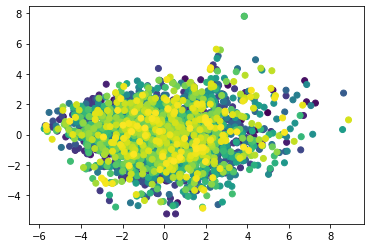

In [ ]:
# Principal Component Pattern Plot 1

plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index)

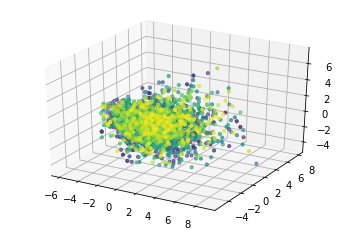

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_pp['PC1'],X_pp['PC2'],X_pp['PC3'], s=10, c = X_pp.index)
plt.show()